<center><h1> Exploring Weather Trends

<div style="text-align: right">
    Parth Thakur<br>
    27/09/2018<br>
    <a href=https://www.linkedin.com/in/parth-thakur>LinkedIn</a>
</div>

In [1]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read data into pandas DataFrames

pune_weather = pd.read_csv("datasets/pune_temp.csv")
global_weather = pd.read_csv("datasets/global_temp.csv")

In [3]:
# Sample Data

pune_weather.head()

,year,avg_temp
0,1796,24.39
1,1797,25.17
2,1798,24.05
3,1799,24.68
4,1800,24.67


In [4]:
# Calculate moving average over 10 years.

pune_weather = pune_weather.merge(pune_weather.rolling(10, on="year").mean(), on="year")
global_weather = global_weather.merge(global_weather.rolling(10, on="year").mean(), on="year")

In [5]:
# Sample data with moving average.

global_weather.head(15)

,year,avg_temp_x,avg_temp_y
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,NaN
5,1755,8.36,NaN
6,1756,8.85,NaN
7,1757,9.02,NaN
8,1758,6.74,NaN
9,1759,7.99,8.030


In [6]:
# Dict to rename columns in DataFrame
rename_dict = {"avg_temp_x": "avg_temp",
               "avg_temp_y": "moving_average"}

# Dict to set fontsize in figure.
font_dict = {'fontsize': 15}

In [7]:
# Rename columns

pune_weather.rename(columns=rename_dict, inplace=True)
global_weather.rename(columns=rename_dict, inplace=True)

In [8]:
# Sample with renamed columns.

pune_weather.head(10)

,year,avg_temp,moving_average
0,1796,24.39,NaN
1,1797,25.17,NaN
2,1798,24.05,NaN
3,1799,24.68,NaN
4,1800,24.67,NaN
5,1801,23.94,NaN
6,1802,25.18,NaN
7,1803,24.95,NaN
8,1804,25.33,NaN
9,1805,24.80,24.716


Text(0.06,0.5,'Temperature [°C]')

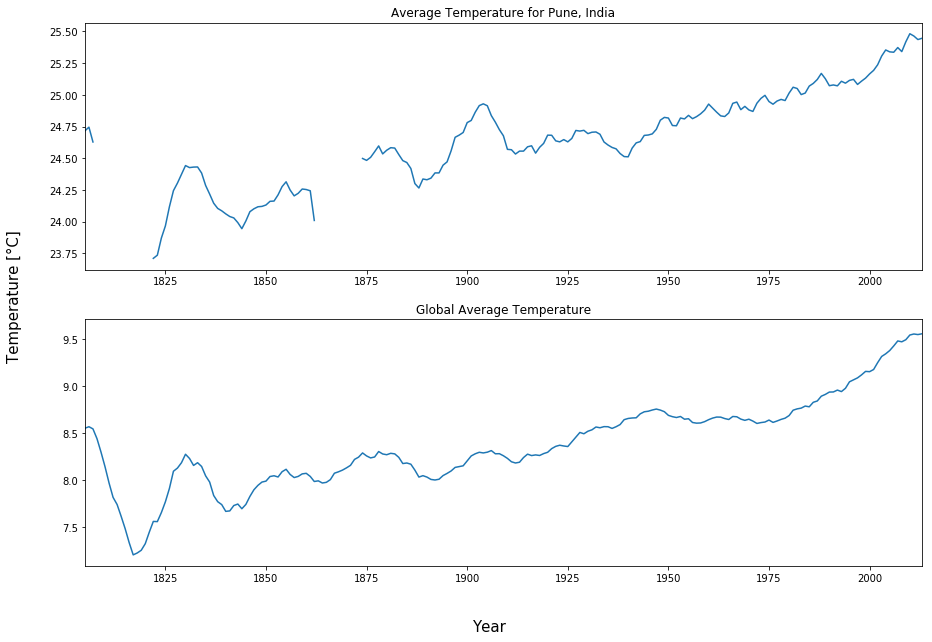

In [10]:
# Plot data.

fig = plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.xlim(1805, 2013)
plt.title("Average Temperature for Pune, India")
plt.plot(pune_weather.year, pune_weather.moving_average)

plt.subplot(2,1,2)
plt.xlim(1805, 2013)
plt.title("Global Average Temperature")
plt.plot(global_weather.year, global_weather.moving_average)

fig.text(0.5, 0.04, 'Year', ha='center', va='center', fontdict=font_dict)
fig.text(0.06, 0.5, "Temperature [\U000000B0C]", ha='center', va='center', rotation='vertical', fontdict=font_dict)

Right off the bat we can observe that average temperatures have definately gone up. The global average has risen from just less than 8.5ºC to almost 9.5ºC between 1796 and 2013. That's a rise of more than 1C! Average tempreature in Pune seems to have gone up by 0.75ºC in the same time, from 24.75ºC to 25.5ºC.

There's a few missing data points in the dataset for Pune, but the rising trend is still visible.

Next, there seems to be quite a lot of fluctuations in the pre 1900 period. A huge dip in temperature before 1825; this seems to be true for both.

Then there's the spike in average temperature in Pune around 1900. This is probably due to the effects of industrial revolution kicking in. Global average shows a rise too, but not as much as Pune. As the average of the entire world will be less suceptible to changes in local temperatures.

There is also a curious dip in Pune average just before 1950. The global average was on a steady rise during this period so a dip in local average is interesting.